In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data
df = pd.read_csv('bmw.csv')

In [3]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [5]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [6]:
# numerical features
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [7]:
# categorical feature
df.describe(exclude='number')

,model,transmission,fuelType
count,10781,10781,10781
unique,24,3,5
top,3 Series,Semi-Auto,Diesel
freq,2443,4666,7027


<AxesSubplot:xlabel='price', ylabel='Density'>

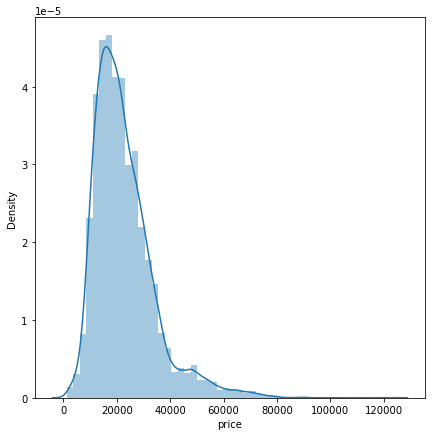

In [8]:
# target feature

plt.figure(figsize=(7,7))
sns.distplot(df['price'])

<AxesSubplot:xlabel='price'>

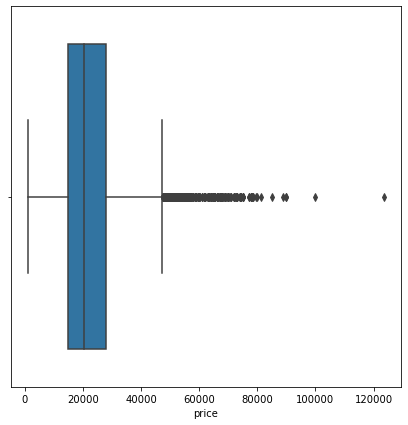

In [9]:
plt.figure(figsize=(7,7))
sns.boxplot(df['price'])

<AxesSubplot:>

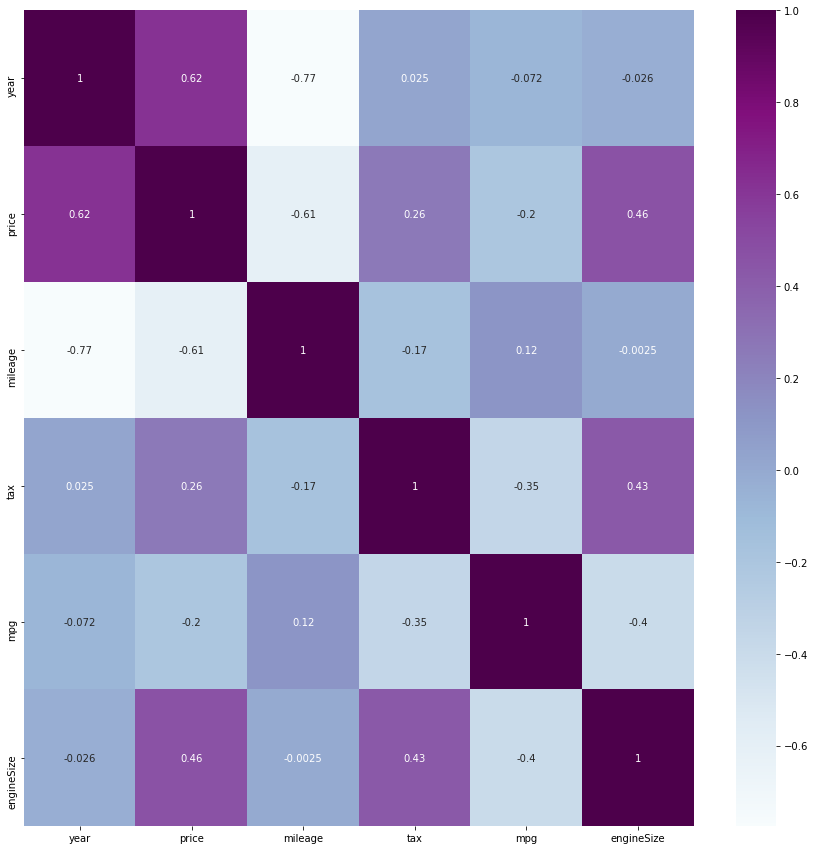

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(df[df.describe().columns].corr(), annot=True, cmap='BuPu')

In [11]:
df['model'] = df['model'].apply(lambda x: x.strip())

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df.shape

(10781, 9)

In [14]:
# split the data

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [15]:
X_train.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
4756,1 Series,2017,Semi-Auto,18852,Diesel,150,70.6,2.0
8276,X3,2015,Automatic,15131,Diesel,150,54.3,2.0
8359,X3,2016,Automatic,65392,Diesel,200,47.9,3.0
3144,X1,2019,Semi-Auto,5163,Petrol,145,39.2,2.0
10581,3 Series,2017,Automatic,34544,Diesel,145,56.5,3.0


In [16]:
X_train.columns

Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize'],
      dtype='object')

In [18]:
# preprocessing

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder

scaled_cols = ['mileage', 'tax', 'mpg']
onehot_encoded_cols = ['model', 'transmission', 'fuelType']
ordinal_encoded_cols = ['year', 'engineSize']

scaler = MinMaxScaler()
onehot_encoder = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

col_transformer = ColumnTransformer([
    ('scaler', scaler, scaled_cols),
    ('onehot', onehot_encoder, onehot_encoded_cols),
    ('ordinal', ordinal_encoder, ordinal_encoded_cols)
])

In [19]:
# modeling
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# metric evaluation
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
# Linear Regression base model
linreg_pipeline = Pipeline([
    ('col_transformer', col_transformer),
    ('poly', PolynomialFeatures(degree=2)),
    ('regression', LinearRegression())
])

linreg_pipeline.fit(X_train,y_train)

# predict
y_pred = linreg_pipeline.predict(X_test)
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared :', r2_score(y_test, y_pred))

RMSE : 2947.5058041515317
R-squared : 0.9352023463041904


In [21]:
int(linreg_pipeline.predict(X_test)[0])

28898

In [ ]:
# # hyperparameter LinReg

# linreg_hyper = Pipeline([
#     ('col_transformer', col_transformer),
#     ('poly', PolynomialFeatures(degree=2)),
#     ('regression', LinearRegression())
# ])

# param_grid = {
#     'regression__fit_intercept' : [False, True]
# }

# grid_search = GridSearchCV(
#     estimator=linreg_hyper,
#     param_grid=param_grid,
#     cv=3,
#     n_jobs=-1
# )

# grid_search.fit(X_train, y_train)

In [ ]:
# # Logistic Regression base model
# logreg_pipeline = Pipeline([
#     ('col_transformer', col_transformer),
#     ('poly', PolynomialFeatures(degree=2)),
#     ('regression', LogisticRegression())
# ])

# logreg_pipeline.fit(X_train,y_train)

# # predict
# y_pred = logred_pipeline.predict(X_test)
# print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))
# print('R-squared :', r2_score(y_test, y_pred))